# Home Loan Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras.models import Sequential
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc

### 1. Load the dataset that is given to you

In [3]:
# Load the given dataset

data = pd.read_csv('loan_data.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Check the shape of the data

data.shape

(307511, 122)

In [5]:
# Check the size of the data

data.size

37516342

In [6]:
# Check the information of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### 2. Check for null values in the dataset

In [9]:
# Find out the Null or missing value in dataset

data.isnull().sum().any()

True

In [10]:
null_data = data.isna().sum()/data.shape[0]*100
null_data.sort_values(ascending=False,inplace=True)
null_data = null_data.reset_index()
null_data.head(40)

,index,0
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_AVG,69.432963
5,NONLIVINGAPARTMENTS_MEDI,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MODE,68.354953
8,LIVINGAPARTMENTS_AVG,68.354953
9,LIVINGAPARTMENTS_MEDI,68.354953


In [11]:
col = null_data['index'].head(40)
col

0              COMMONAREA_MEDI
1               COMMONAREA_AVG
2              COMMONAREA_MODE
3     NONLIVINGAPARTMENTS_MODE
4      NONLIVINGAPARTMENTS_AVG
5     NONLIVINGAPARTMENTS_MEDI
6           FONDKAPREMONT_MODE
7        LIVINGAPARTMENTS_MODE
8         LIVINGAPARTMENTS_AVG
9        LIVINGAPARTMENTS_MEDI
10               FLOORSMIN_AVG
11              FLOORSMIN_MODE
12              FLOORSMIN_MEDI
13            YEARS_BUILD_MEDI
14            YEARS_BUILD_MODE
15             YEARS_BUILD_AVG
16                 OWN_CAR_AGE
17               LANDAREA_MEDI
18               LANDAREA_MODE
19                LANDAREA_AVG
20           BASEMENTAREA_MEDI
21            BASEMENTAREA_AVG
22           BASEMENTAREA_MODE
23                EXT_SOURCE_1
24          NONLIVINGAREA_MODE
25           NONLIVINGAREA_AVG
26          NONLIVINGAREA_MEDI
27              ELEVATORS_MEDI
28               ELEVATORS_AVG
29              ELEVATORS_MODE
30          WALLSMATERIAL_MODE
31             APARTMENTS_MEDI
32      

In [12]:
data = data.drop(col,axis=1)

In [13]:
data.shape

(307511, 82)

### 3. Print percentage of default to payer of the dataset for the TARGET column

In [14]:
data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [15]:
defaulters = (data['TARGET'] == 1).sum()
payers = (data['TARGET'] == 0).sum()
print('Defaulters : ',defaulters)
print('Payers : ',payers)

Defaulters :  24825
Payers :  282686


In [16]:
default_perc = (defaulters/payers)*100
print("Percentage of default to payer is {:.2f} %".format(default_perc))

Percentage of default to payer is 8.78 %


### 4. Balance the dataset if the data is imbalanced

Text(0.5, 1.0, 'Dataset is Balance or Not')

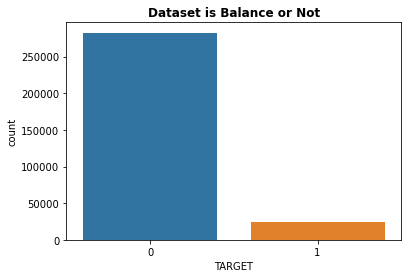

In [17]:
sns.countplot(data['TARGET'])
plt.title('Dataset is Balance or Not',weight='bold',fontsize=12)

<AxesSubplot:title={'center':'Percentage of the imbalanced data'}, ylabel='TARGET'>

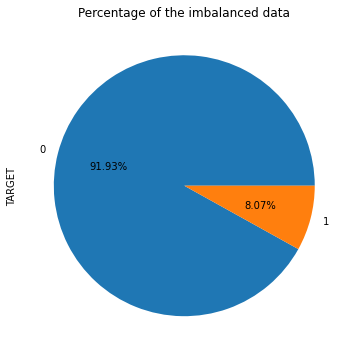

In [18]:
data.TARGET.value_counts().plot(kind='pie',autopct='%.2f%%', title='Percentage of the imbalanced data',figsize=(6,6))

In [19]:
shuffled_data = data.sample(frac=1,random_state=20)
fraud_data = shuffled_data[shuffled_data['TARGET'] == 1]
nonfraud_data = shuffled_data[shuffled_data['TARGET'] == 0].sample(n=24825,random_state=20)
balance_data = pd.concat([fraud_data,nonfraud_data])

### 5.  Plot the balanced data or imbalanced data

Text(0.5, 1.0, 'Dataset is Balance or Not')

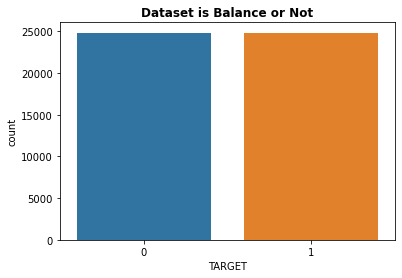

In [20]:
sns.countplot(balance_data['TARGET'])
plt.title('Dataset is Balance or Not',weight='bold',fontsize=12)

In [21]:
balance_data.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE
count,49650,49650,49650,49650,49471,49650,49650,49650,49650,35423,49650,49650,23321,24616
unique,2,2,2,2,7,7,5,5,6,18,7,58,3,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,No
freq,45615,30662,33566,34310,40445,27817,37082,30663,43484,10217,8828,11642,22871,24196


### 6. Encode the columns that is required for the model

In [22]:
# Find the categorical values in the dataset and and encode them

dictionary = {}
dictionary['categorical'] = balance_data.dtypes[balance_data.dtypes == 'object'].index
dictionary

{'categorical': Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
        'EMERGENCYSTATE_MODE'],
       dtype='object')}

In [23]:
for column in balance_data:
    if balance_data[column].dtypes == 'object':
        print(f'{column} : {balance_data[column].unique()}')

NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
CODE_GENDER : ['M' 'F']
FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['N' 'Y']
NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Other_A' 'Spouse, partner' 'Other_B' 'Children'
 nan 'Group of people']
NAME_INCOME_TYPE : ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Unemployed'
 'Maternity leave' 'Student']
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Separated' 'Widow']
NAME_HOUSING_TYPE : ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE : ['Laborers' 'Sales staff' nan 'Managers' 'Secretaries'
 'High skill tech staff' 'Medicine staff' 'Core staff'
 'Low-skill Laborers' 'Drivers' 'Security staff' 'Cleaning staff'
 'Cooking staff' 'Accountants' 'Waiters/barmen staff' 'HR staff'
 'Privat

In [24]:
encoder = LabelEncoder()
balance_data['NAME_CONTRACT_TYPE'] = encoder.fit_transform(balance_data['NAME_CONTRACT_TYPE'])
balance_data['CODE_GENDER'] = encoder.fit_transform(balance_data['CODE_GENDER'])
balance_data['FLAG_OWN_CAR'] = encoder.fit_transform(balance_data['FLAG_OWN_CAR'])
balance_data['NAME_INCOME_TYPE'] = encoder.fit_transform(balance_data['NAME_INCOME_TYPE'])
balance_data['NAME_EDUCATION_TYPE'] = encoder.fit_transform(balance_data['NAME_EDUCATION_TYPE'])
balance_data['NAME_FAMILY_STATUS'] = encoder.fit_transform(balance_data['NAME_FAMILY_STATUS'])
balance_data['NAME_HOUSING_TYPE'] = encoder.fit_transform(balance_data['NAME_HOUSING_TYPE'])
balance_data['OCCUPATION_TYPE'] = encoder.fit_transform(balance_data['OCCUPATION_TYPE'])
balance_data['ORGANIZATION_TYPE'] = encoder.fit_transform(balance_data['ORGANIZATION_TYPE'])
balance_data['HOUSETYPE_MODE'] = encoder.fit_transform(balance_data['HOUSETYPE_MODE'])
balance_data["NAME_CONTRACT_TYPE"]=encoder.fit_transform(balance_data["NAME_CONTRACT_TYPE"])
balance_data['FLAG_OWN_REALTY']=encoder.fit_transform(balance_data['FLAG_OWN_REALTY'])
balance_data['NAME_TYPE_SUITE']=encoder.fit_transform(balance_data['NAME_TYPE_SUITE'])
balance_data['WEEKDAY_APPR_PROCESS_START']=encoder.fit_transform(balance_data['WEEKDAY_APPR_PROCESS_START'])
balance_data['EMERGENCYSTATE_MODE']=encoder.fit_transform(balance_data['EMERGENCYSTATE_MODE'])

In [25]:
dictionary = {}
dictionary['categorical'] = balance_data.dtypes[balance_data.dtypes == 'object'].index
dictionary

{'categorical': Index([], dtype='object')}

In [26]:
balance_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
247205,386051,1,0,1,0,0,1,180000.0,1473871.5,43222.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
212658,346441,1,0,0,0,1,1,180000.0,647046.0,19048.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
111346,229187,1,0,0,0,1,0,225000.0,481176.0,26100.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,6.0
89315,203696,1,0,0,0,0,0,135000.0,646920.0,25195.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
259738,400581,1,0,0,0,1,0,180000.0,545040.0,26640.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 247205 to 87599
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    49650 non-null  int64  
 1   TARGET                        49650 non-null  int64  
 2   NAME_CONTRACT_TYPE            49650 non-null  int64  
 3   CODE_GENDER                   49650 non-null  int32  
 4   FLAG_OWN_CAR                  49650 non-null  int32  
 5   FLAG_OWN_REALTY               49650 non-null  int32  
 6   CNT_CHILDREN                  49650 non-null  int64  
 7   AMT_INCOME_TOTAL              49650 non-null  float64
 8   AMT_CREDIT                    49650 non-null  float64
 9   AMT_ANNUITY                   49649 non-null  float64
 10  AMT_GOODS_PRICE               49613 non-null  float64
 11  NAME_TYPE_SUITE               49650 non-null  int32  
 12  NAME_INCOME_TYPE              49650 non-null  int32  
 

In [28]:
float_col = balance_data.select_dtypes('float').columns
int_col = balance_data.select_dtypes('int64').columns
column_process = int_col.append(float_col)

In [29]:
len(column_process)

69

In [30]:
column_process

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CNT_CHILDREN',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_A

In [31]:
# Find the Nan or Missing value and treatment on it by using simple imputer.

imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
balance_data[column_process] = imputer.fit_transform(balance_data[column_process])

In [32]:
# after treatment of find the missing value is available or not

balance_data.isnull().sum().sum()

0

In [33]:
# after treatment of find the missing value is available or not

null_counts = balance_data.isna().sum()/balance_data.shape[0]*100
null_counts.sort_values(ascending=False,inplace=True)
null_counts.head(40)

SK_ID_CURR                      0.0
FLAG_DOCUMENT_7                 0.0
FLAG_DOCUMENT_5                 0.0
FLAG_DOCUMENT_4                 0.0
FLAG_DOCUMENT_3                 0.0
FLAG_DOCUMENT_2                 0.0
DAYS_LAST_PHONE_CHANGE          0.0
DEF_60_CNT_SOCIAL_CIRCLE        0.0
OBS_60_CNT_SOCIAL_CIRCLE        0.0
DEF_30_CNT_SOCIAL_CIRCLE        0.0
OBS_30_CNT_SOCIAL_CIRCLE        0.0
EMERGENCYSTATE_MODE             0.0
TOTALAREA_MODE                  0.0
HOUSETYPE_MODE                  0.0
FLOORSMAX_MEDI                  0.0
YEARS_BEGINEXPLUATATION_MEDI    0.0
FLOORSMAX_MODE                  0.0
YEARS_BEGINEXPLUATATION_MODE    0.0
FLOORSMAX_AVG                   0.0
FLAG_DOCUMENT_6                 0.0
FLAG_DOCUMENT_8                 0.0
TARGET                          0.0
FLAG_DOCUMENT_9                 0.0
AMT_REQ_CREDIT_BUREAU_QRT       0.0
AMT_REQ_CREDIT_BUREAU_MON       0.0
AMT_REQ_CREDIT_BUREAU_WEEK      0.0
AMT_REQ_CREDIT_BUREAU_DAY       0.0
AMT_REQ_CREDIT_BUREAU_HOUR  

In [34]:
# Split the dataset for model building

X = balance_data.drop(['TARGET'],axis=1)
y = balance_data[['TARGET']]

In [35]:
# all variable values convert in 0 to 1 form by using standard scaler. 

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=25)

In [37]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(37237, 81)
(12413, 81)
(37237, 1)
(12413, 1)


In [38]:
# Build the model

model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(xtrain.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [39]:
# Find the summary of model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               20992     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [40]:
# Compile the model

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [41]:
# Fit the model

model.fit(xtrain,ytrain,epochs=100,batch_size=256,validation_data=(xtest,ytest))

Epoch 1/100
146/146 [==============================] - 8s 22ms/step - loss: 0.6813 - accuracy: 0.5931 - val_loss: 0.6266 - val_accuracy: 0.6750
Epoch 2/100
146/146 [==============================] - 2s 16ms/step - loss: 0.6347 - accuracy: 0.6492 - val_loss: 0.6196 - val_accuracy: 0.6770
Epoch 3/100
146/146 [==============================] - 2s 14ms/step - loss: 0.6240 - accuracy: 0.6631 - val_loss: 0.6121 - val_accuracy: 0.6785
Epoch 4/100
146/146 [==============================] - 2s 14ms/step - loss: 0.6197 - accuracy: 0.6641 - val_loss: 0.6082 - val_accuracy: 0.6799
Epoch 5/100
146/146 [==============================] - 2s 14ms/step - loss: 0.6161 - accuracy: 0.6706 - val_loss: 0.6133 - val_accuracy: 0.6812
Epoch 6/100
146/146 [==============================] - 2s 13ms/step - loss: 0.6126 - accuracy: 0.6735 - val_loss: 0.6101 - val_accuracy: 0.6793
Epoch 7/100
146/146 [==============================] - 2s 14ms/step - loss: 0.6113 - accuracy: 0.6720 - val_loss: 0.6059 - val_accuracy:

In [42]:
prediction = (model.predict(xtest)>0.5)*1.0
prediction

388/388 [==============================] - 1s 3ms/step


array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [43]:
print('Confusion Matrix : ')
print(confusion_matrix(prediction,ytest))

Confusion Matrix : 
[[3898 1780]
 [2289 4446]]


In [44]:
print('Classification Report : ')
print(classification_report(prediction,ytest))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.63      0.69      0.66      5678
         1.0       0.71      0.66      0.69      6735

    accuracy                           0.67     12413
   macro avg       0.67      0.67      0.67     12413
weighted avg       0.68      0.67      0.67     12413



In [45]:
test_loss,test_accuracy = model.evaluate(xtest,ytest)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

388/388 [==============================] - 1s 4ms/step - loss: 0.6108 - accuracy: 0.6722
Test Loss:  0.610781192779541
Test Accuracy:  0.672198474407196


### 7.  Calculate Sensitivity as a metrice

Sensitivity=TP/(FN+TP)

Specificity=TN/(FP+TN)

In [48]:
print('Sensitivity of the dataset is: ',3898/(1780+3898))

Sensitivity of the dataset is:  0.6865093342726312


### 8. Calculate area under receiver operating characteristics curve

False Postive Rate : [0.         0.31349067 1.        ]
True Positive Rate : [0.         0.66013363 1.        ]
Threshold values : [2. 1. 0.]


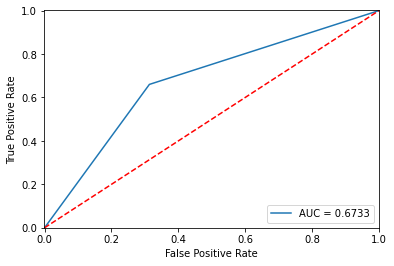

In [47]:
fpr,tpr,threshold = roc_curve(prediction,ytest)
roc_auc = auc(fpr,tpr)
print('False Postive Rate :',fpr)
print('True Positive Rate :',tpr)
print('Threshold values :',threshold)

plt.plot(fpr,tpr,label='AUC = %0.4f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()